<a href="https://colab.research.google.com/github/herdian0/Ecommerce-Analysis-Clustering/blob/main/W6W7W8_Herdian_Iswara_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
from sklearn import cluster
from silhoutte import silhoutte_analysis

# **Uploading the csv files**

In [ ]:
su1 = 'https://docs.google.com/spreadsheets/d/1tcAkJK-Xo6QkneIs0ihOyEs08NKjsb33Q63fc_nu4fo/edit#gid=1265637324'
sut1 = su1.replace('/edit#gid=', '/export?format=csv&gid=')
op = pd.read_csv(sut1)
op.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
su2 = 'https://docs.google.com/spreadsheets/d/1D0twymt-6nnK2azpC2cgAFsIJyD2daqkJ8zuqVtco_w/edit#gid=1931492204'
sut2 = su2.replace('/edit#gid=', '/export?format=csv&gid=')
c = pd.read_csv(sut2)
c.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
su3 = 'https://docs.google.com/spreadsheets/d/1PK08ybe-ljyqxiF-Mx0o2f3pxP1IYk_6PPK7Qqo3koY/edit#gid=531407793'
sut3 = su3.replace('/edit#gid=', '/export?format=csv&gid=')
o = pd.read_csv(sut3)
o.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


In [ ]:
opc = op.copy()
oc = o.copy()
cc = c.copy()

print(opc.info(), '\n')
print(oc.info(), '\n')
print(cc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  ob

# **Merging the data**
- Merging all the data sets.
- Making sure the timeseries are in timeseries format.

In [ ]:
df = oc.merge(opc, how = 'left', left_on = 'order_id', right_on = 'order_id').merge(cc, how = 'left', left_on = 'customer_id', right_on = 'customer_id')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00,1.0,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00,1.0,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00,1.0,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00,1.0,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
dfc = df.copy()

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_sequential             103886 non-null  float64
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  float64
 11  payment_value                  103886 non-null  float64
 12  customer_unique_id            

In [ ]:
date_fc = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
dfc[date_fc] = dfc[date_fc].apply(pd.to_datetime)

# **Checking duplicates**
- There are duplicated values, but after checking the details, those duplicated values have different payment type and also values, so it make sense to think that the duplicated values are not outliers but the customer places many items or maybe use multiple payment type in one order.

In [ ]:
dfc['order_id'].duplicated().sum()

4446

In [ ]:
dfc[dfc['order_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,1.0,credit_card,1.0,8.34,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP
23,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23,3.0,voucher,1.0,24.86,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23,1.0,credit_card,1.0,5.96,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103774,0572c996d9b4a7645bb071a158a64bbb,874b661d62c1e74aafa401942f9d94cb,delivered,2017-11-20 21:53:20,2017-11-20 22:07:27,2017-11-22 00:32:47,2017-11-27 21:28:53,2017-12-11,1.0,credit_card,1.0,42.59,7517f4a85dc09bf65c48bb972b8a582c,22793,rio de janeiro,RJ
103783,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 14:46:51,2018-04-05 15:09:52,2018-04-07 01:32:58,2018-04-30 21:41:07,2018-05-14,2.0,voucher,1.0,49.32,6e11aa7fefec6405ba35e05a8c0f9b0e,66073,belem,PA
103784,4bafa54db6b060da198f23f810835969,48094f58f03bec9519bd0e004ce460df,delivered,2018-04-05 14:46:51,2018-04-05 15:09:52,2018-04-07 01:32:58,2018-04-30 21:41:07,2018-05-14,3.0,voucher,1.0,8.13,6e11aa7fefec6405ba35e05a8c0f9b0e,66073,belem,PA
103878,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,2.0,voucher,1.0,64.37,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT


In [ ]:
dfc[dfc['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP


# **Handling missing values**
- Dropping missing values that are in the data.

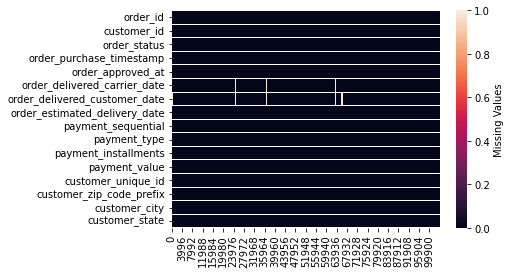

In [ ]:
sns.heatmap(dfc.isna().transpose(), cbar_kws = {'label':'Missing Values'})

In [ ]:
dfc.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [ ]:
dfc = dfc[~(dfc['order_status'] == 'canceled')]

dfc

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
dfc_drop = dfc.dropna()
dfc_drop

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,credit_card,4.0,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
dfc_drop.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

#**Dropping irrelevant columns**
- dropping columns that will not be used in the analysis.

In [ ]:
column = ['order_approved_at', 'payment_sequential', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_state']
dfc_drop = dfc_drop.drop(column, axis = 1)
dfc_drop

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,credit_card,1.0,18.12,sao paulo
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,2.00,sao paulo
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,18.59,sao paulo
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,1.0,141.46,barreiras
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,credit_card,3.0,179.12,vianopolis
...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,credit_card,3.0,85.08,sao jose dos campos
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,credit_card,3.0,195.00,praia grande
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,credit_card,5.0,271.01,nova vicosa
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,credit_card,4.0,441.16,japuiba


# **EDA**
- Checking the descriptive statistics.
- Checking the skewness.

In [ ]:
dfc_drop.describe()

,payment_installments,payment_value
count,100733.000000,100733.000000
mean,2.851915,153.067359
std,2.684557,214.471078
min,0.000000,0.000000
25%,1.000000,56.780000
50%,1.000000,100.000000
75%,4.000000,171.290000
max,24.000000,13664.080000


In [ ]:
dfc_drop.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


payment_installments    1.658597
payment_value           9.470058
dtype: float64

# **Finding outlier**
- Looking at the bloxpots for possible outliers.
- Using IQR to determine the outliers.
- Making sure the order status is all delivered.
- adding several date_column for further EDA.

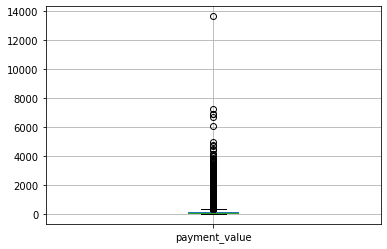

In [ ]:
dfc_drop.boxplot(column = 'payment_value')

In [ ]:
q1 = dfc_drop['payment_value'].quantile(0.25)
q3 = dfc_drop['payment_value'].quantile(0.75)
iqr = q3 - q1
ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr
print('Q1:', q1, '\n')
print('Q3:', q3, '\n')
print('IQR:', iqr, '\n')
print('Upperbound value:', ub, '\n')
print('Lowerbound value:', lb)

Q1: 56.78 

Q3: 171.29 

IQR: 114.50999999999999 

Upperbound value: 343.05499999999995 

Lowerbound value: -114.98499999999999


In [ ]:
filter_upper = dfc_drop['payment_value']>343.05499999999995
filter_lower = dfc_drop['payment_value']<-114.98499999999999

dfc_out = dfc_drop[~(filter_upper | filter_lower)]
dfc_out

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,credit_card,1.0,18.12,sao paulo
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,2.00,sao paulo
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,18.59,sao paulo
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,1.0,141.46,barreiras
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,credit_card,3.0,179.12,vianopolis
...,...,...,...,...,...,...,...,...,...,...,...
103881,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,credit_card,3.0,155.99,sao paulo
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,credit_card,3.0,85.08,sao jose dos campos
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,credit_card,3.0,195.00,praia grande
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,credit_card,5.0,271.01,nova vicosa


In [ ]:
dfc_out = dfc_out[~(dfc_out['order_status'] == 'canceled')]
dfc_out

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,credit_card,1.0,18.12,sao paulo
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,2.00,sao paulo
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,18.59,sao paulo
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,1.0,141.46,barreiras
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,credit_card,3.0,179.12,vianopolis
...,...,...,...,...,...,...,...,...,...,...,...
103881,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,credit_card,3.0,155.99,sao paulo
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,credit_card,3.0,85.08,sao jose dos campos
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,credit_card,3.0,195.00,praia grande
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,credit_card,5.0,271.01,nova vicosa


In [ ]:
dfc_out['date_month'] = dfc_out['order_purchase_timestamp'].dt.month
dfc_out['date_year'] = dfc_out['order_purchase_timestamp'].dt.year
dfc_out['date_day'] = dfc_out['order_purchase_timestamp'].dt.dayofweek
dfc_out

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city,date_month,date_year,date_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,credit_card,1.0,18.12,sao paulo,10,2017,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,2.00,sao paulo,10,2017,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,18.59,sao paulo,10,2017,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,1.0,141.46,barreiras,7,2018,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,credit_card,3.0,179.12,vianopolis,8,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,credit_card,3.0,155.99,sao paulo,2,2017,3
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,credit_card,3.0,85.08,sao jose dos campos,3,2017,3
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,credit_card,3.0,195.00,praia grande,2,2018,1
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,credit_card,5.0,271.01,nova vicosa,8,2017,6


In [ ]:
day_n = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

for i in range(7):
  dfc_out['date_day'] = dfc_out['date_day'].replace(i, day_n[i])
dfc_out

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,customer_city,date_month,date_year,date_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,credit_card,1.0,18.12,sao paulo,10,2017,monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,2.00,sao paulo,10,2017,monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,1.0,18.59,sao paulo,10,2017,monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,1.0,141.46,barreiras,7,2018,tuesday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,credit_card,3.0,179.12,vianopolis,8,2018,wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,credit_card,3.0,155.99,sao paulo,2,2017,thursday
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,credit_card,3.0,85.08,sao jose dos campos,3,2017,thursday
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,credit_card,3.0,195.00,praia grande,2,2018,tuesday
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,credit_card,5.0,271.01,nova vicosa,8,2017,sunday


# **Making new table with aggregation**
- Aggregating table to group the order id into one, so it will be easier to count and easier to do the EDA later on.

In [ ]:
at = dfc_out.groupby(['order_id', 'customer_city', 'date_day', 'date_month', 'date_year'])['payment_value'].agg(['sum'])
atd = at.reset_index()
atd

,order_id,customer_city,date_day,date_month,date_year,sum
0,00010242fe8c5a6d1ba2dd792cb16214,campos dos goytacazes,wednesday,9,2017,72.19
1,00018f77f2f0320c557190d7a144bdd3,santa fe do sul,wednesday,4,2017,259.83
2,000229ec398224ef6ca0657da4fc703e,para de minas,sunday,1,2018,216.87
3,00024acbcdf0a6daa1e931b038114c75,atibaia,wednesday,8,2018,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,varzea paulista,saturday,2,2017,218.04
...,...,...,...,...,...,...
88888,fffb2ef8874127f75b52b643880fd7e0,cordeiro,friday,3,2018,39.96
88889,fffbee3b5462987e66fb49b1c5411df2,montes claros,tuesday,6,2018,139.88
88890,fffce4705a9662cd70adb13d4a31832d,sao paulo,monday,10,2017,116.85
88891,fffe18544ffabc95dfada21779c9644f,vinhedo,monday,8,2017,64.71


**Number of orders per month**
- The number order from 2016 is significantly increasing in 2017.
- From the data we can see that the number of order in 2018 is better than 2017 in every month.
- in 2018, we see a decrease starting from june.


In [ ]:
pt = pd.pivot_table(atd, values = 'sum', index = ['date_month'], columns = ['date_year'], aggfunc = 'count')
pt

date_year,2016,2017,2018
date_month,,,
1,NaN,659.0,6566.0
2,NaN,1511.0,6111.0
3,NaN,2342.0,6438.0
4,NaN,2102.0,6236.0
5,NaN,3266.0,6190.0
6,NaN,2903.0,5580.0
7,NaN,3609.0,5635.0
8,NaN,3881.0,5895.0
9,NaN,3793.0,NaN


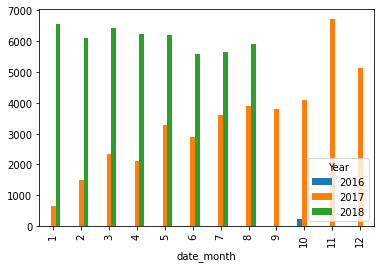

In [ ]:
pt.plot(kind = 'bar')
plt.legend(loc='lower right', title='Year')
#Grafik dibuat month year sehingga bisa melihat dari waktu ke waktu (misal dari januari 2016 hingga Desember 2018)
#Lebih baik menggunakan linechart

**Daily orders trend**
- Monday have the highest overall number of orders in 2017 and 2018.
- Saturday have the lowest overall number of orders in 2017 and 2018.

In [ ]:
day_index = dict(zip(day_n, range(len(day_n))))
print(day_index, '\n')

pt2 = pd.pivot_table(at, values = 'sum', index = ['date_day'], columns = ['date_year'], aggfunc = 'count')
pt2['date_id'] = pt2.index
pt2['date_id'] = pt2['date_id'].map(day_index)
pt2

{'monday': 0, 'tuesday': 1, 'wednesday': 2, 'thursday': 3, 'friday': 4, 'saturday': 5, 'sunday': 6} 



date_year,2016,2017,2018,date_id
date_day,,,,
friday,33,6090,6441,4
monday,40,6349,8049,0
saturday,30,4449,5225,5
sunday,17,4954,5829,6
thursday,36,5782,7383,3
tuesday,49,6385,7872,1
wednesday,30,5998,7852,2


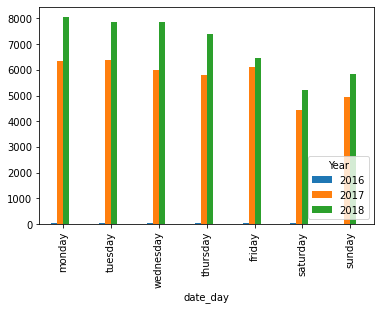

In [ ]:
var_1 = 2016
var_2 = 2017
var_3 = 2018

pt2 = pt2.sort_values(['date_id'], ascending = True)
pt2.plot(kind = 'bar')
plt.legend(['{}'.format(var_1), '{}'.format(var_2), '{}'.format(var_3)], loc = 'lower right', title = 'Year')

#Sudah oke

**Percentage of order per payment type**
- People tends to use credit card with the percentage of 73.4% and people less likely to use debit card with the percentage of 1.5%

In [ ]:
at2 = dfc_out.groupby('payment_type')['payment_type'].agg(['count'])
at2 = at2.rename(columns = {'count' : 'num_total'})
at2 = at2.reset_index()
at2

,payment_type,num_total
0,boleto,17939
1,credit_card,68271
2,debit_card,1406
3,voucher,5422


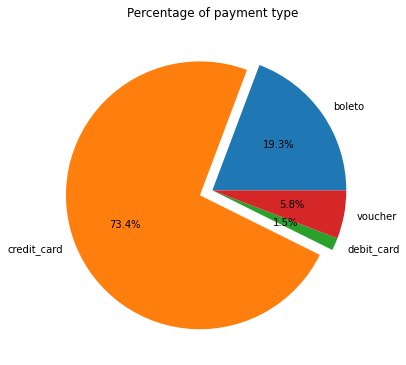

In [ ]:
xpl = (0, 0.1, 0, 0)

plt.figure(figsize = (6,12))
plt.title('Percentage of payment type', fontsize = 12)
plt.pie(at2['num_total'], explode = xpl, labels = at2['payment_type'], autopct = '%0.1f%%')
plt.show()

**Top 10 number of orders per city**
- Sao paulo have the highest number of order over all city, followed by rio de janeiro and belo horizonte.

In [ ]:
at3 = dfc_out.groupby('customer_city')['payment_type'].agg(['count'])
at3 = at3.rename(columns = {'count' : 'num_total'})
at3 = at3.reset_index()
at3 = at3.sort_values('num_total', ascending = False).head(10)
at3

,customer_city,num_total
3452,sao paulo,14734
3023,rio de janeiro,6353
435,belo horizonte,2611
533,brasilia,1959
1099,curitiba,1420
676,campinas,1374
2836,porto alegre,1274
3114,salvador,1176
1470,guarulhos,1140
3289,sao bernardo do campo,907


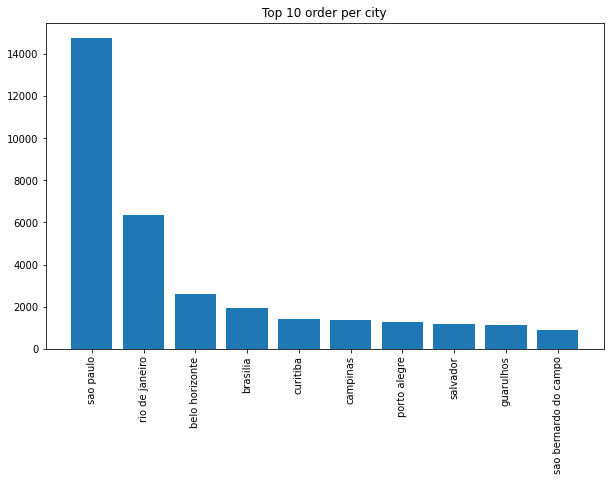

In [ ]:
x = at3['customer_city']
y = at3['num_total']

plt.figure(figsize = (10, 6))
plt.title('Top 10 order per city', fontsize = 12)
plt.xticks(rotation = 90)
plt.bar(x, y)
plt.show()

# **Cluster Analysis - Advanced Assignment**

In [ ]:
ca = dfc_out.groupby(['order_id'])['payment_value'].agg(['sum', 'count'])
can = ca.reset_index()
can = can.rename(columns = {'sum' : 'total_sales', 'count' : 'total_order'})
can = can.drop(columns = 'order_id', axis = 1)
can

,total_sales,total_order
0,72.19,1
1,259.83,1
2,216.87,1
3,25.78,1
4,218.04,1
...,...,...
88888,39.96,1
88889,139.88,1
88890,116.85,1
88891,64.71,1


In [ ]:
dist = []
ran = range(1, 11)

for i in ran:
  kmean_model = cluster.KMeans(n_clusters = i)
  kmean_model.fit(can)
  dist.append(kmean_model.inertia_)
dist

[467254104.44812,
 146337107.03069428,
 70375253.76029707,
 41993699.67646065,
 28376820.069605827,
 20828740.16549184,
 16253687.823905682,
 13144032.70624952,
 10894969.360557467,
 9048378.72787416]

<Figure size 1152x576 with 0 Axes>

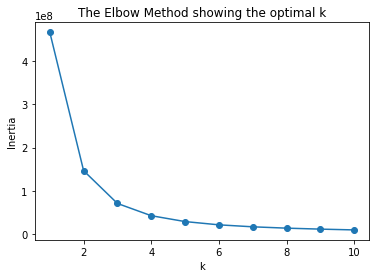

In [ ]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(ran, dist, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6311407714465802
For n_clusters = 3 The average silhouette_score is : 0.5917231354613005
For n_clusters = 4 The average silhouette_score is : 0.569577905655197
For n_clusters = 5 The average silhouette_score is : 0.5558076500970788


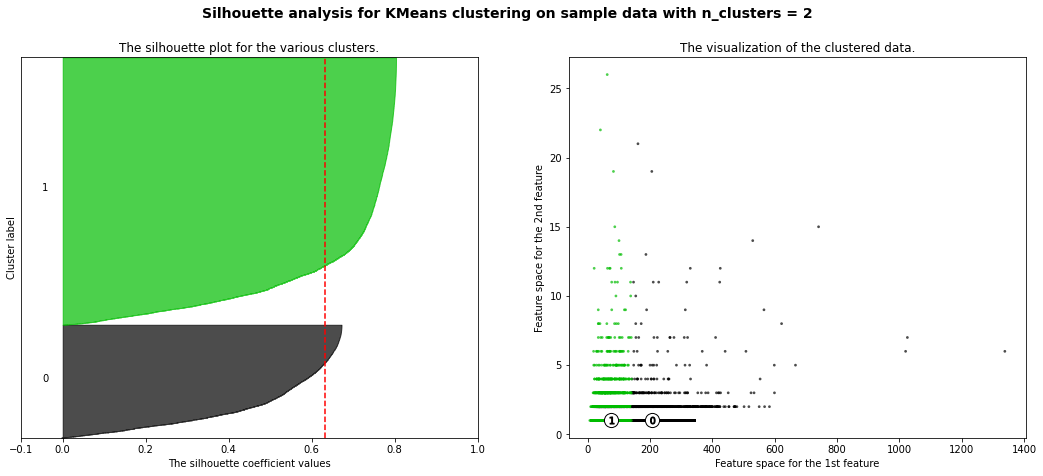

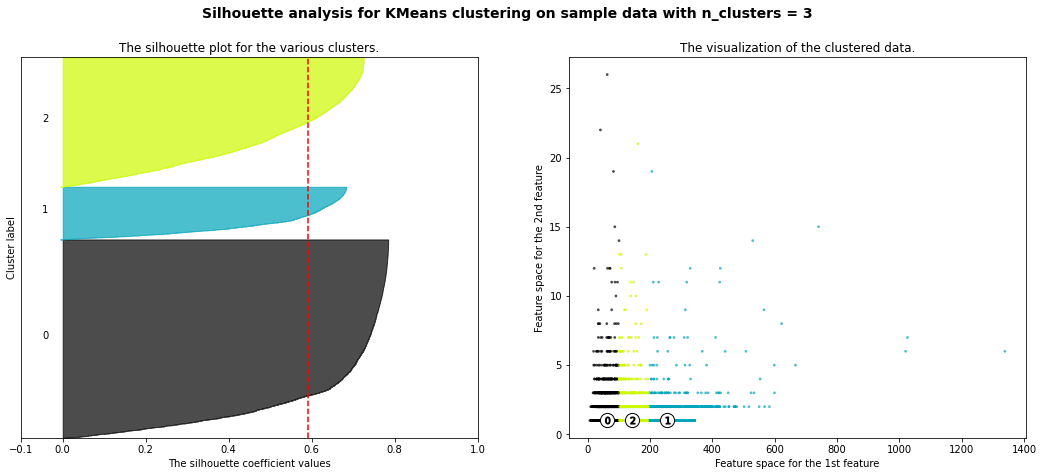

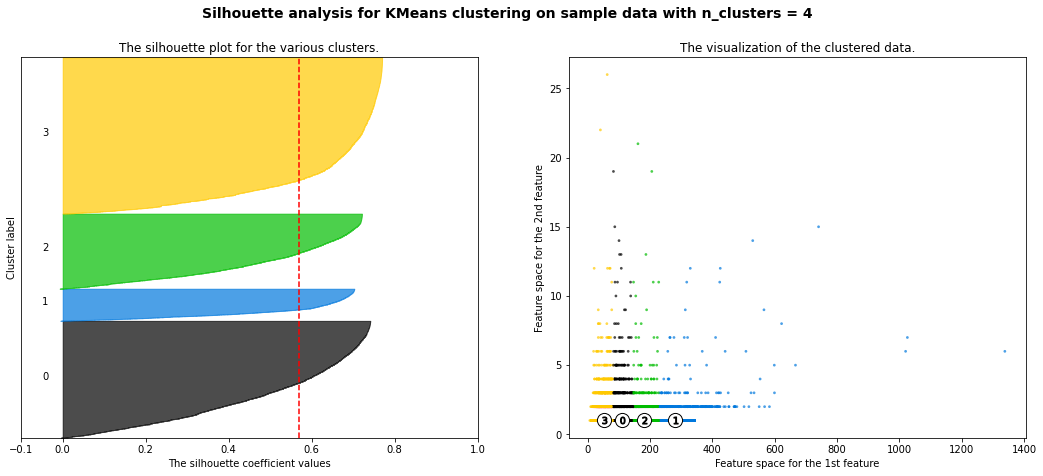

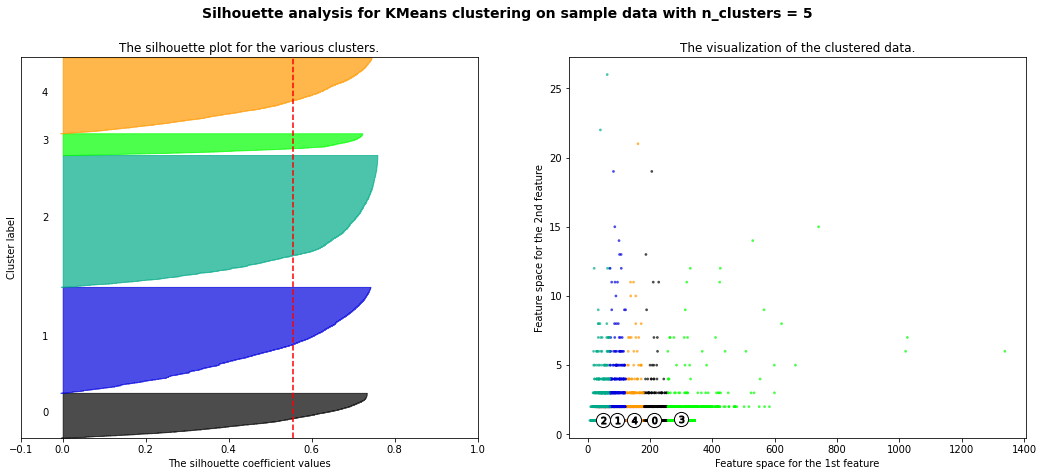

In [ ]:
silhoutte_analysis(can,[2, 3, 4, 5])

In [ ]:
cluster_model = cluster.KMeans(n_clusters = 3)
cluster_array = cluster_model.fit(can)
cluster_label = cluster_model.labels_

can['cluster'] = cluster_label
can

,total_sales,total_order,cluster
0,72.19,1,0
1,259.83,1,1
2,216.87,1,1
3,25.78,1,0
4,218.04,1,1
...,...,...,...
88888,39.96,1,0
88889,139.88,1,2
88890,116.85,1,2
88891,64.71,1,0


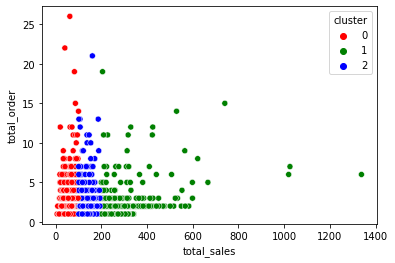

In [ ]:
colour = ['red', 'green', 'blue']
sns.scatterplot(x ='total_sales', y ='total_order', data = can, hue = 'cluster', palette = colour)